# 計程車小費預測 (用各種方法去算回歸)

## 載入套件
- 顯示版本

In [2]:
import tensorflow as tf

print(tf.__version__)

2.9.1


## 檢查 GPU 是否存在

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 載入資料集

In [4]:
import seaborn as sns

df = sns.load_dataset("tips")

### 簡單 EDA 一下

- 看前 10 筆

In [5]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


- 看後 10 筆

In [6]:
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 方法一 : 使用矩陣計算線性回歸方程式

### 先用單一特徵

#### 載入模組

In [7]:
import numpy as np

#### 線性回歸

In [8]:
# 線性迴歸
X = df[["total_bill"]].values
y = df[["tip"]].values
X.shape, y.shape

((244, 1), (244, 1))

- 設定 b 對應的 x , 固定為 1

In [9]:
# 設定 b 對應的 X，固定為 1
one = np.ones((X.shape[0], 1))
one.shape

(244, 1)

- 跟 x 合併在一起

In [10]:
# X 結合 b 對應的 X
X = np.concatenate((X, one), axis = 1)
X.shape

(244, 2)

In [11]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([[0.10502452],
       [0.92026961]])

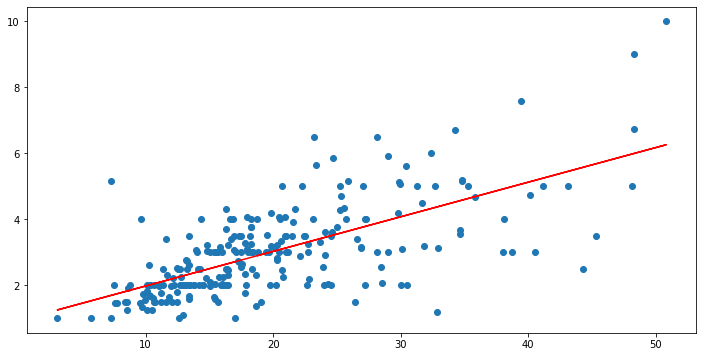

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] * beta[0, 0] + beta[1, 0], "r")

### 使用多元特徵

#### 設定 X(特徵), y(目標)

In [13]:
# 設定 X(特徵)、y(目標)
y = df.tip
X = df.drop("tip", axis = 1)
X.head(10)

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
5,25.29,Male,No,Sun,Dinner,4
6,8.77,Male,No,Sun,Dinner,2
7,26.88,Male,No,Sun,Dinner,4
8,15.04,Male,No,Sun,Dinner,2
9,14.78,Male,No,Sun,Dinner,2


In [14]:
X["sex"].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [15]:
X["sex"] = X["sex"].map({"Female":0, "Male":1})

In [16]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,No,Sun,Dinner,2
1,10.34,1,No,Sun,Dinner,3
2,21.01,1,No,Sun,Dinner,3
3,23.68,1,No,Sun,Dinner,2
4,24.59,0,No,Sun,Dinner,4


In [17]:
X["smoker"].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [18]:
X["smoker"] = X["smoker"].map({"No":0, "Yes": 1})

In [19]:
X["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [20]:
X['day'] = X['day'].map({'Sun':4, 'Sat':3, 'Fri':2, 'Thur':1})

In [21]:
X["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [22]:
X['time'] = X['time'].map({'Dinner':0, 'Lunch':1})

In [23]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,4,0,2
1,10.34,1,0,4,0,3
2,21.01,1,0,4,0,3
3,23.68,1,0,4,0,2
4,24.59,0,0,4,0,4


- 先把 X 複製一份到 df2

In [24]:
df2 = X.copy()

In [25]:
# 線性回歸
X = X.values
y = df[["tip"]].values
X.shape, y.shape

((244, 6), (244, 1))

In [26]:
# 設定 b 對應的 X , 固定為 1
one = np.ones((X.shape[0], 1))
one.shape

(244, 1)

In [31]:
# X 結合 b 對應的 X
X = np.concatenate((X, one), axis = 1)
X.shape

(244, 7)

In [32]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[ 0.09432509],
       [-0.03464496],
       [-0.07566309],
       [ 0.05273982],
       [ 0.11247777],
       [ 0.17481962],
       [ 0.55878577]])

In [33]:
MSE = np.mean((y - X @ w)**2)
MSE

1.0120303172536846

- 求 ${R}^2$

In [34]:
mean_y = np.mean(y)
SST = np.sum((y - mean_y)**2)
SSE = np.sum((y - X @ w)**2)
R2 = 1 - (SSE/SST)
R2

0.4691986789000201

## 方法二: 使用 scikit learn regression 演算法來計算

In [35]:
X.shape

(244, 7)

In [36]:
X2 = X.copy()[:, :-1]

In [37]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X2, y)
clf.coef_, clf.intercept_

(array([[ 0.09432509, -0.03464496, -0.07566309,  0.05273982,  0.11247777,
          0.17481962]]),
 array([0.55878577]))

- 求 ${R^2}$

In [38]:
clf.score(X2, y)

0.4691986789000201

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y, clf.predict(X2)), mean_squared_error(y, clf.predict(X2))

(0.4691986789000201, 1.0120303172536846)

## 方法三 : 使用梯度下降計算線性回歸方程式

In [40]:
import tensorflow as tf

In [41]:
X = df2.values
# X 結合 b 對應的 X
X = np.concatenate((X, one), axis = 1)
X.shape

(244, 7)

In [42]:
y.shape

(244, 1)

In [43]:
y = y.reshape(-1)

In [44]:
w0 = tf.Variable(np.random.randn(), dtype = tf.float64)
w1 = tf.Variable(np.random.randn(), dtype = tf.float64)
w2 = tf.Variable(np.random.randn(), dtype = tf.float64)
w3 = tf.Variable(np.random.randn(), dtype = tf.float64)
w4 = tf.Variable(np.random.randn(), dtype = tf.float64)
w5 = tf.Variable(np.random.randn(), dtype = tf.float64)
w6 = tf.Variable(np.random.randn(), dtype = tf.float64)

X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)


In [45]:
epochs = range(2000)
learning_rate = 0.002

for epoch in epochs:
    with tf.GradientTape() as t:
        y_pred = X[:, 0] * w0 + X[:, 1] * w1 + X[:, 2] * w2 + X[:, 3] * w3 + \
                X[:, 4] * w4 + X[:, 5] * w5 + X[:, 6] * w6

        # 損失函數
        current_loss = tf.reduce_mean(tf.square(y - y_pred))

    # 自動微分
    dw = t.gradient(current_loss, [w0, w1, w2, w3, w4, w5, w6])

    # 更新梯度
    w0.assign_sub(learning_rate * dw[0])
    w1.assign_sub(learning_rate * dw[1])
    w2.assign_sub(learning_rate * dw[2])
    w3.assign_sub(learning_rate * dw[3])
    w4.assign_sub(learning_rate * dw[4])
    w5.assign_sub(learning_rate * dw[5])
    w6.assign_sub(learning_rate * dw[6])

    if (epoch+1) % 100 == 0:
        w_list = [w0.numpy(), w1.numpy(), w2.numpy(),w3.numpy(), w4.numpy(), w5.numpy(), w6.numpy()]
        print(f"Epoch {epoch+1:2d}: loss = {current_loss}, W = {np.around(np.array(w_list), 4)}")    

Epoch 100: loss = 4.689345445061882, W = [ 0.3049  0.8314  1.0761 -0.2266 -0.5669 -1.0416 -1.089 ]
Epoch 200: loss = 2.628522246450176, W = [ 0.2038  0.8299  0.9853  0.0904 -0.4386 -0.5665 -0.9216]
Epoch 300: loss = 1.9674667410003537, W = [ 0.1562  0.7912  0.8985  0.1721 -0.3216 -0.272  -0.8224]
Epoch 400: loss = 1.6530581361846073, W = [ 0.1311  0.7413  0.8195  0.1773 -0.2227 -0.0767 -0.7546]
Epoch 500: loss = 1.473403328798829, W = [ 0.1166  0.6899  0.7485  0.1622 -0.1408  0.0577 -0.7032]
Epoch 600: loss = 1.3621917402094263, W = [ 0.1074  0.6401  0.685   0.1456 -0.0733  0.1519 -0.6614]
Epoch 700: loss = 1.2894999383556542, W = [ 0.1013  0.5933  0.6281  0.1326 -0.0171  0.218  -0.6258]
Epoch 800: loss = 1.2394816460456364, W = [ 0.0971  0.5496  0.5768  0.1241  0.0301  0.264  -0.5947]
Epoch 900: loss = 1.2032813945533045, W = [ 0.0943  0.509   0.5305  0.1194  0.0705  0.2953 -0.5669]
Epoch 1000: loss = 1.175832296051184, W = [ 0.0924  0.4714  0.4885  0.1177  0.1054  0.316  -0.5416]
Epo

In [46]:
clf.coef_, clf.intercept_

(array([[ 0.09432509, -0.03464496, -0.07566309,  0.05273982,  0.11247777,
          0.17481962]]),
 array([0.55878577]))

In [47]:
y_pred = X[:, 0] * w0 + X[:, 1] * w1 + X[:, 2] * w2 + X[:, 3] * w3 + \
        X[:, 4] * w4 + X[:, 5] * w5 + X[:, 6] * w6

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.4425471348599219, 1.062844377991715)

## 方法四 使用神經網路計算線性回歸方程式

In [49]:
X = tf.convert_to_tensor(df2.values, dtype = tf.float64)

In [50]:
X

<tf.Tensor: shape=(244, 6), dtype=float64, numpy=
array([[16.99,  0.  ,  0.  ,  4.  ,  0.  ,  2.  ],
       [10.34,  1.  ,  0.  ,  4.  ,  0.  ,  3.  ],
       [21.01,  1.  ,  0.  ,  4.  ,  0.  ,  3.  ],
       ...,
       [22.67,  1.  ,  1.  ,  3.  ,  0.  ,  2.  ],
       [17.82,  1.  ,  0.  ,  3.  ,  0.  ,  2.  ],
       [18.78,  0.  ,  0.  ,  1.  ,  0.  ,  2.  ]])>

In [51]:
y = df.tip.values

- X.shape[1] 是第六的維度

In [52]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units = 1, input_shape = [X.shape[1]])
    ]
)

In [53]:
model.compile(loss = "mean_squared_error",
                optimizer = tf.keras.optimizers.Adam(0.002))

In [54]:
model.fit(X, y, epochs = 1000)

Epoch 1/1000
8/8 [==============================] - 2s 2ms/step - loss: 116.8712
Epoch 2/1000
8/8 [==============================] - 0s 1ms/step - loss: 107.0812
Epoch 3/1000
8/8 [==============================] - 0s 1ms/step - loss: 98.0141
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 89.3240
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 81.3392
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 73.7561
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 66.8320
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 60.3895
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 54.3966
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 49.0289
Epoch 11/1000
8/8 [==============================] - 0s 1ms/step - loss: 44.0502
Epoch 12/1000
8/8 [==============================] - 0s 2ms/step - loss: 39.4377
Epoch 13/1000
8/8 [================

In [55]:
model.evaluate(X, y)

8/8 [==============================] - 0s 1ms/step - loss: 1.0137


1.0136867761611938

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y, model.predict(X)), mean_squared_error(y, model.predict(X))

8/8 [==============================] - 0s 973us/step


(0.4683298744965734, 1.0136867871249908)

- 雖然我們是用 TensorFlow 神經網路的梯度下降來求到準確度, 但她內部應該有做一些調整, 所以結果比我們單純用梯度下降來的好